In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
from __future__ import annotations
from hierataxo import  OrderManager
from hierataxo.dataset import ConcatProteinDataModule
import pickle as pkl
import pandas as pd
import torch
import matplotlib.pyplot as plt
from hierataxo.util import xkcd_color,hide_spline
from hierataxo.util import named_taxo_palette
from hierataxo.plot_taxotree import configure_rcParams,order_manager,manual_modify_graph_pos
c_rcParams=configure_rcParams()


In [56]:
from hierataxo.util import OrderManager

order_manager=OrderManager('taxo_data/hierarchy_order_Riboviria.pkl',
    level_names=['Kingdom','Phylum','Class','Order'],
    layout_prog='dot')
manual_modify_graph_pos(order_manager.graph_pos)

!


In [ ]:
order_manager

In [50]:
order_manager.layout_prog

'dot'

In [37]:
pred:pd.DataFrame=pd.read_pickle('infer/exp7/seed-77-singledomain.pkl') #

In [43]:
# pred[pred['name'].apply(lambda x: 'AAV1||KF421905' in x)].index

Index([1, 2, 3, 4], dtype='int64')

In [38]:
from hierataxo.plot_taxotree import order_manager,standard_classification_view
import matplotlib.pyplot as plt
from typing import List,Dict
# order_manager=OrderManager(
#     pkl.load(open('taxo_data/hierarchy_order.pkl','rb'))['Riboviria'],
#     level_names=['Kingdom','Phylum','Class','Order'],
#     layout_prog='dot',
#     layout_modification=layout_modification,
#     )

# manual_modify_graph_pos(order_manager.graph_pos)

def fetch_pred_dist(s:pd.Series):
    return [torch.tensor([s[f'{i}_predict']]) for i in order_manager.level_names]

def distribution_to_color_dict(s:pd.Series)->Dict[str,tuple]:
    p=fetch_pred_dist(s)
    return order_manager.distribution_to_color_dict(p)
# order_manager.cal_true_probs
def taxo_label_to_color_dict(s:pd.Series)->Dict[str,tuple]:
    return order_manager.distribution_to_color_dict(
        order_manager.order_to_onehot(s['taxo_label']))
from hierataxo.plot_taxotree import standard_classification_view


In [39]:
from hierataxo.plot_taxotree import order_manager

In [7]:
fetch_pred_dist(pred.loc[0])

[tensor([[-2.3125,  3.8398, -1.6074]]),
 tensor([[-1.8174, -1.3154, -0.5381,  6.5312, -2.1543, -1.2988,  0.0677]]),
 tensor([[-2.0781, -0.9033, -1.1592, -0.1792,  0.4832,  0.0265, -1.9609,  0.8149,
           0.2695,  2.7148,  2.8203,  6.5273, -0.2153, -0.0413, -2.1289, -0.3767,
          -2.4531, -1.9717, -0.1649, -2.2383, -2.5000,  1.0947]]),
 tensor([[-0.1055, -0.3218, -1.0752, -0.1794, -0.3794,  1.3711, -1.0010,  0.7915,
          -2.2402,  0.6333,  0.6626,  2.6328,  1.0986,  1.0156,  7.3672,  0.3054,
           0.1735, -2.2480, -2.1621, -0.2484, -2.8945, -1.4453,  0.0275, -1.7500,
          -3.3438,  0.5664, -1.9873, -1.1602, -1.3105, -0.2952,  2.1406]])]

In [13]:
# order_manager.order_to_onehot(s['taxo_label'])[0][0].argmax()

tensor(1)

In [66]:
for _,s in pred.iterrows():
    p=order_manager.cal_true_probs(fetch_pred_dist(s),order_manager.order_to_onehot(s['taxo_label']))[-1]
    if 0.5<p<0.6:
        print(_,s['name'])
    # break

64 ABTV||KC994644-0-Rhabdo_ncap
68 ABTV||KC994644-4-Methyltrans_Mon
83 ACDACV|dsRNA1|AJ781166-0-Phytoreo_S7
106 AClV5||MN661033-2-Mononeg_mRNAcap
120 ACoV-WA1087||MK472067-12-DUF2075
159 ACoV-WA3607||MK472070-9-CoV_NSP10
215 AEV1||KU297983-2-PLRV_ORF5
281 AHNV|RNA2|AJ245641-0-Capsid-VNN
374 ALV||MW826497-4-BDV_P40
411 AMV-A1||KP770140-1-CRPV_capsid
424 AMVV1|0|LN713933-2-Methyltrans_Mon
487 ANSSV||MH330686-6-Poty_coat
503 AOPRV||AY072921-2-DUF2075
547 APMV12||KC333050-0-Paramyxo_ncap
555 APMV12||KC333050-8-Methyltrans_Mon
565 APMV14||KX258200-0-Paramyxo_ncap
588 APMV16||KY511044-5-HN
638 APMV3||EU782025-0-Paramyxo_ncap
664 APMV5||GU206351-9-Methyltrans_Mon
691 APMV8||FJ215863-8-Methyltrans_Mon
696 APMV9||EU910942-4-Matrix
710 APOIV||AF160193-3-Flavi_glycoprot
748 APV1||FJ824737-0-Vmethyltransf
760 APV2||KT893294-5-RdRP_2
784 APVC||KY452444-4-Fusion_gly
796 ARAV||EF614259-2-Rhabdo_glycop
839 ARUV||KM204987-4-Methyltrans_Mon
877 ASPV||D21829-1-2OG-FeII_Oxy_2
885 ASPV||EU156171-2-Fusion_g

In [72]:
pred.iloc[760]

name                                         APV2||KT893294-5-RdRP_2
seq                [REFEEKKTSKSAAVIENHSGRSCRDWLADVGFIFMKSQFCSKWDN...
taxo_label         [Orthornavirae, Kitrinoviricota, Alsuviricetes...
domain_label                                                [RdRP_2]
taxo                                                    [1, 2, 4, 6]
sentence_mask                                                    [1]
input_ids          [[0, 10, 9, 18, 9, 9, 15, 15, 11, 8, 15, 8, 5,...
attention_mask     [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
Kingdom_predict              [-2.49609375, 5.51953125, -3.306640625]
Phylum_predict     [-1.19140625, -3.822265625, 5.25390625, -1.864...
Class_predict      [-2.140625, -3.4140625, -2.6015625, -0.6020507...
Order_predict      [-2.888671875, -4.3359375, -4.12109375, -0.443...
predict_label      [Orthornavirae, Kitrinoviricota, Alsuviricetes...
Name: 760, dtype: object

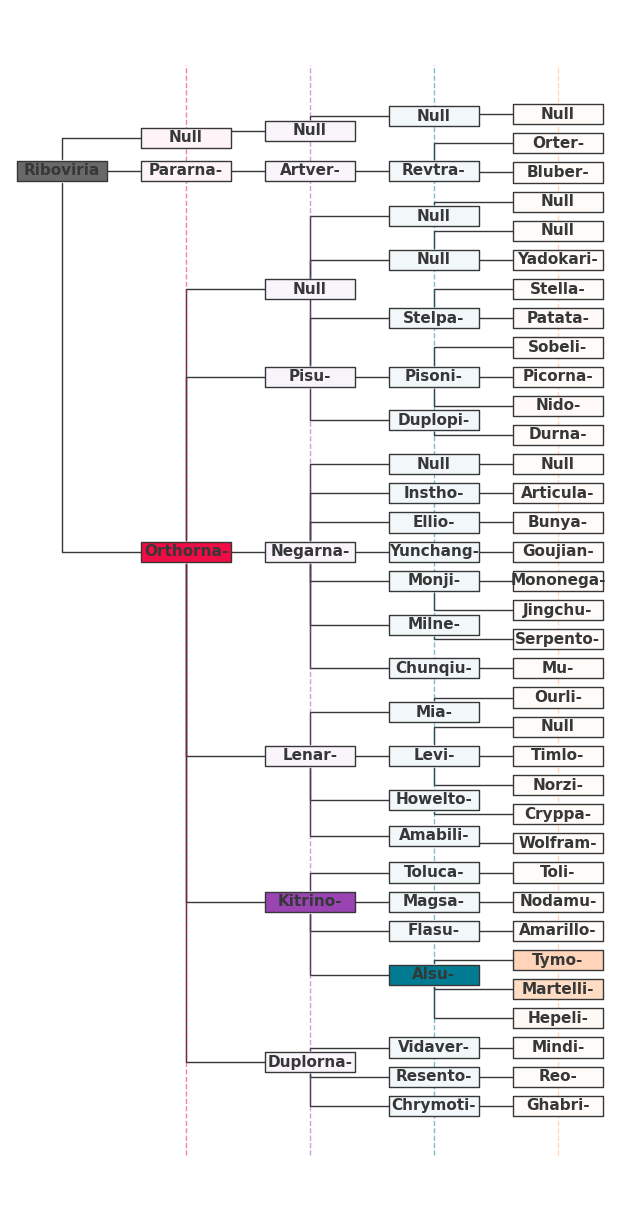

In [77]:

plt.close()
fig,ax=plt.subplots(1,1,figsize=(6,12))
standard_classification_view(
    distribution_to_color_dict(pred.iloc[760    ]),
    ax,
    order_manager,
    )
fig.tight_layout(pad=0.0)
plt.show()
fig.savefig('tmp_cm_ana/figs/fig2-confusedpred-1.svg')
# plt.close()

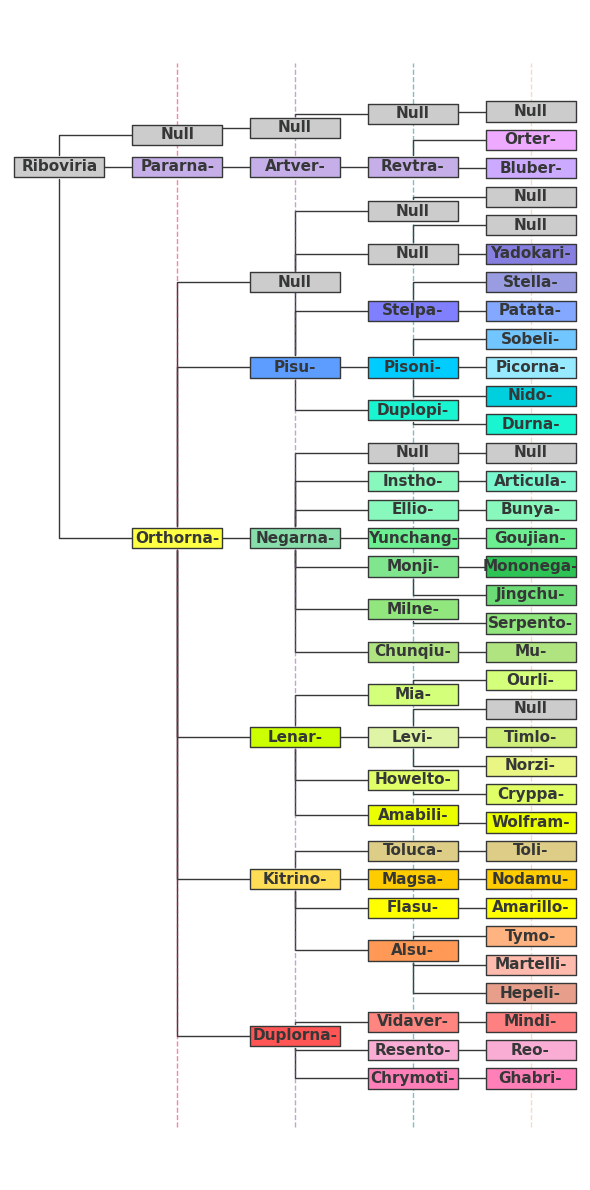

In [58]:
from hierataxo.plot_taxotree import named_taxo_palette
plt.close()
fig,ax=plt.subplots(1,1,figsize=(6,12))
standard_classification_view(named_taxo_palette,ax,set_rcParams=True)
plt.tight_layout()
plt.show()

In [21]:

plt.close()
fig,ax=plt.subplots(1,1,figsize=(6,12))
standard_classification_view(
    taxo_label_to_color_dict(pred.iloc[1000]),
    ax,
    order_manager)
fig.tight_layout(pad=0.0)
# plt.show()
plt.close()
# order_manager.order_to_onehot(pred.iloc[1000]['taxo_label'])

In [9]:
# order_manager.order_to_onehot(pred.iloc[0]['taxo_label'])
def to_prob_tensors(pred:pd.DataFrame)->Dict[str,torch.Tensor]:
    o={f'{i}_gt':[] for i in order_manager.level_names}
    o.update({f'{i}_pred':[] for i in order_manager.level_names})
    for _,s in pred.iterrows():
        gts=order_manager.order_to_onehot(s['taxo_label'])
        preds=fetch_pred_dist(s)
        for level,gt,p in zip(order_manager.level_names,gts,preds):
            o[f'{level}_gt'].append(gt)
            o[f'{level}_pred'].append(p)
    for k,v in o.items():
        o[k]=torch.concat(v)
    return o

def cal_acc(pred:pd.DataFrame):
    prob_tensors=to_prob_tensors(pred)
    o={}
    for level in order_manager.level_names:
        o[level]=torch.sum(torch.argmax(prob_tensors[f'{level}_pred'],dim=1
            )==torch.argmax(prob_tensors[f'{level}_gt'],dim=1)).item()/len(pred)
    return o

# cal_acc(pred)

    # for i,level in enumerate(order_manager.level_names):


In [12]:
cal_acc(pd.read_pickle('infer/exp7/seed-42-singledomain.pkl'))

{'Kingdom': 0.950337108359406,
 'Phylum': 0.7486008901423347,
 'Class': 0.6702066716608646,
 'Order': 0.5844974221125457}

In [27]:
cal_acc(pred)

{'Kingdom': 0.9540386903450403,
 'Phylum': 0.7597497025514476,
 'Class': 0.6838672718459436,
 'Order': 0.6073679108095007}

In [16]:
cal_acc(pd.read_pickle('infer/exp7/seed-77-singledomain.pkl'))

{'Kingdom': 0.9540386903450403,
 'Phylum': 0.7597497025514476,
 'Class': 0.6838672718459436,
 'Order': 0.6073679108095007}

In [45]:
for seed in [7,11,42,77,10043]:
    pred:pd.DataFrame=pd.read_pickle(f'infer/reload_ckpt/seed-{seed}-singledomain.pkl')
    print(seed)
    print(cal_acc(pred))

7
{'Kingdom': 0.8575772264574979, 'Phylum': 0.49120874278411847, 'Class': 0.33468470453443794, 'Order': 0.3072753712598599}
11
{'Kingdom': 0.8930947869387036, 'Phylum': 0.5688978980302296, 'Class': 0.4297801084034724, 'Order': 0.3543383422200679}
42
{'Kingdom': 0.9435949411712863, 'Phylum': 0.4842462433349491, 'Class': 0.35050456087780374, 'Order': 0.30330939056096595}
77
{'Kingdom': 0.9193143260036134, 'Phylum': 0.5491120609879698, 'Class': 0.44097298726479534, 'Order': 0.40179791125016523}
10043
{'Kingdom': 0.932666461023223, 'Phylum': 0.4423390472833032, 'Class': 0.31454633587449876, 'Order': 0.27656105406953685}


In [46]:
# pred:pd.DataFrame=pd.read_pickle(f'infer/reload_ckpt/seed-77-singledomain.pkl')

In [78]:
pred['d']=pred['domain_label'].apply(lambda x:x[0])
pred['order']=pred['taxo_label'].apply(lambda x:x[-1])
domainwise_acc=pred.groupby('d').apply(cal_acc).to_dict()
domainwise_count=pred.groupby('d').apply(lambda x:len(x)).to_dict()
for k,v in domainwise_acc.items():
    v['count']=domainwise_count[k]
    
import re
pattern = r"RdRP|Pol|Replicase|palm"

for k,v in domainwise_acc.items():
    match = re.search(pattern, k, re.IGNORECASE)
    if match:
        v['domain-type']='RdRP'
    else:
        v['domain-type']='other'
domainwise_ana=pd.DataFrame(domainwise_acc).T.sort_values(by='count',ascending=False)


/tmp/ipykernel_417092/4226794058.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  domainwise_acc=pred.groupby('d').apply(cal_acc).to_dict()
/tmp/ipykernel_417092/4226794058.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  domainwise_count=pred.groupby('d').apply(lambda x:len(x)).to_dict()


In [84]:
import re
pattern = r"RdRP|Pol|Replicase|palm"

pred['domain_type']=pred['d'].apply(lambda x:'RdRP' if re.search(pattern, x, re.IGNORECASE) else 'other')

In [85]:
pred['domain_type'].value_counts()

domain_type
other    18013
RdRP      4680
Name: count, dtype: int64

In [87]:
cal_acc(pred[pred['domain_type']=='RdRP'])

{'Kingdom': 0.9905982905982906,
 'Phylum': 0.9320512820512821,
 'Class': 0.8277777777777777,
 'Order': 0.7782051282051282}

In [105]:
pred[pred['d']=='PK_Tyr_Ser-Thr']['order'].value_counts()

order
Ortervirales    7
Nidovirales     6
Name: count, dtype: int64

In [61]:
pred[pred['d']=='Mononeg_RNA_pol']['predict_label'].apply(lambda x:x[-1]).value_counts().keys()

Index(['Bunyavirales', 'Articulavirales', 'Mononegavirales', 'Reovirales',
       'Muvirales', 'Serpentovirales', 'Goujianvirales', 'Durnavirales'],
      dtype='object', name='predict_label')

In [ ]:
pred[pred['d']=='Mononeg_RNA_pol']['predict_label']

In [63]:
pred.columns

Index(['name', 'seq', 'taxo_label', 'domain_label', 'taxo', 'sentence_mask',
       'input_ids', 'attention_mask', 'Kingdom_predict', 'Phylum_predict',
       'Class_predict', 'Order_predict', 'predict_label', 'd', 'order'],
      dtype='object')

In [71]:
pred[pred['d']=='Mononeg_RNA_pol']['taxo_label'].apply(lambda x:x[-1]).value_counts()

taxo_label
Mononegavirales    594
Jingchuvirales      57
Muvirales            8
Serpentovirales      5
Goujianvirales       2
Name: count, dtype: int64

In [68]:
pred[pred['d']=='Mononeg_RNA_pol']['predict_label'].apply(lambda x:x[-1]).value_counts()

predict_label
Bunyavirales       303
Articulavirales    218
Mononegavirales     97
Reovirales          31
Muvirales            7
Serpentovirales      6
Goujianvirales       3
Durnavirales         1
Name: count, dtype: int64

In [108]:
domainwise_ana.loc['Mononeg_RNA_pol']

Kingdom      0.998498
Phylum       0.960961
Class        0.331832
Order        0.151652
count      666.000000
Name: Mononeg_RNA_pol, dtype: float64

In [118]:
domainwise_ana[(domainwise_ana['count']>200) & (domainwise_ana['Order']>0.5)]

,Kingdom,Phylum,Class,Order,count,domain-type
RdRP_1,0.999081,0.747243,0.734375,0.720588,1088,RdRP
RNA_replicase_B,1.0,0.998914,0.497286,0.648208,921,RdRP
Viral_helicase1,0.968978,0.720803,0.733577,0.60219,548,other
Como_LCP,0.998162,0.939338,0.939338,0.931985,544,other
RdRP_2,1.0,0.813688,0.760456,0.661597,526,RdRP
Bunya_RdRp,1.0,1.0,1.0,1.0,490,RdRP
Parvo_NS1,1.0,0.937634,0.933333,0.903226,465,other
RdRP_3,0.994962,0.738035,0.627204,0.584383,397,RdRP
Vmethyltransf,0.990991,0.612613,0.624625,0.624625,333,other
L_protein_N,1.0,0.586957,0.586957,0.590062,322,other


In [99]:
domainwise_ana[domainwise_ana['count']>250]

,Kingdom,Phylum,Class,Order,count,domain-type
RdRP_1,0.98989,0.915441,0.806066,0.811581,1088,RdRP
RNA_replicase_B,1.0,1.0,0.997828,0.97937,921,RdRP
Phage_mat-A,0.953515,0.710884,0.865079,0.620181,882,other
Mononeg_RNA_pol,1.0,0.984985,0.597598,0.316817,666,RdRP
Mononeg_mRNAcap,0.995363,0.914992,0.942813,0.863988,647,other
Peptidase_C3G,0.948995,0.98609,0.98609,0.690881,647,other
Viral_helicase1,0.979927,0.833942,0.826642,0.642336,548,other
Como_LCP,0.996324,0.998162,0.996324,0.994485,544,other
RdRP_2,1.0,0.838403,0.807985,0.794677,526,RdRP
Methyltrans_Mon,0.997984,0.875,0.671371,0.564516,496,other


In [100]:
len(domainwise_ana[(domainwise_ana['count']>200) & (domainwise_ana['Order']>0.5) & (domainwise_ana['domain-type']=='other') ])

20

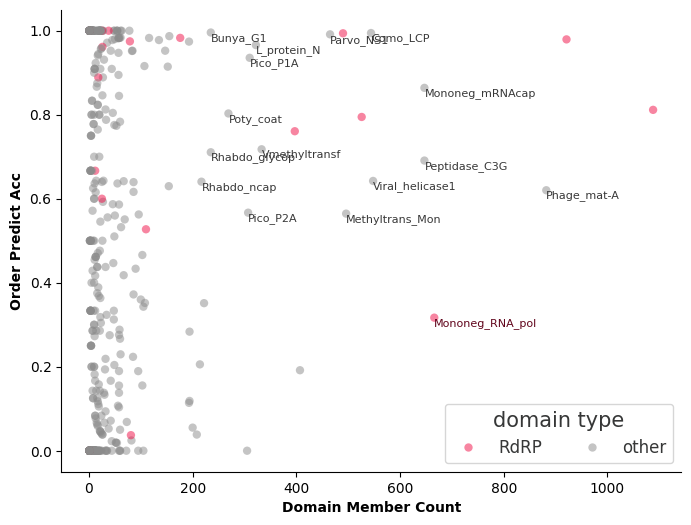

In [26]:
import seaborn as sns
from hierataxo.util import taxo_palette,hide_spline
plt.close()
fig,ax=plt.subplots(1,1,figsize=(8,6))
sns.scatterplot(domainwise_ana,x='count',y='Order',hue='domain-type',alpha=0.5,palette={'RdRP':taxo_palette['red_(crayola)'][0],'other':taxo_palette['battleship_gray'][0]},ax=ax,linewidth=0)
hide_spline(ax,'tr')
ax.set_xlabel('Domain Member Count')
ax.set_ylabel('Order Predict Acc')
sns.move_legend(ax,'lower right',ncol=2,fontsize=12,title_fontsize=15,title='domain type')
for _,s in domainwise_ana[(domainwise_ana['count']>200) & (domainwise_ana['Order']>0.5)].iterrows():
    if s['domain-type']=='other':
        ax.text(s['count'],s['Order'], _, 
            fontsize=8,color=taxo_palette['battleship_gray'][200],
            horizontalalignment='left',verticalalignment='top')
        
s=domainwise_ana.loc['Mononeg_RNA_pol']
ax.text(s['count'],s['Order'], 'Mononeg_RNA_pol', 
    fontsize=8,color=taxo_palette['red_(crayola)'][200],
    horizontalalignment='left',verticalalignment='top')
plt.show()
fig.savefig('tmp_cm_ana/figs/acc-single-domain.svg')

In [15]:
domainwise_count

d
2OG-FeII_Oxy_2     40
30K_MP_C_Ter        2
3A                 46
3keto-disac_hyd     1
7kD_DNA_binding    22
                   ..
zf-CCCH_4           4
zf-CCHC_3           1
zf-CCHC_5          10
zf-RING_13         22
zf-RRN7             1
Length: 515, dtype: int64

In [32]:
prob_tensors=to_prob_tensors(pred)

In [34]:
len(pred)

6660

In [ ]:
font_scalings = {
    'xx-small': 0.579,
    'x-small':  0.694,
    'small':    0.833,
    'medium':   1.0,
    'large':    1.200,
    'x-large':  1.440,
    'xx-large': 1.728,
    'larger':   1.2,
    'smaller':  0.833,
    None:       1.0,
}
stretch_dict = {
    'ultra-condensed': 100,
    'extra-condensed': 200,
    'condensed':       300,
    'semi-condensed':  400,
    'normal':          500,
    'semi-expanded':   600,
    'semi-extended':   600,
    'expanded':        700,
    'extended':        700,
    'extra-expanded':  800,
    'extra-extended':  800,
    'ultra-expanded':  900,
    'ultra-extended':  900,
}
weight_dict = {
    'ultralight': 100,
    'light':      200,
    'normal':     400,
    'regular':    400,
    'book':       400,
    'medium':     500,
    'roman':      500,
    'semibold':   600,
    'demibold':   600,
    'demi':       600,
    'bold':       700,
    'heavy':      800,
    'extra bold': 800,
    'black':      900,
}
_weight_regexes = [
    # From fontconfig's FcFreeTypeQueryFaceInternal; not the same as
    # weight_dict!
    ("thin", 100),
    ("extralight", 200),
    ("ultralight", 200),
    ("demilight", 350),
    ("semilight", 350),
    ("light", 300),  # Needs to come *after* demi/semilight!
    ("book", 380),
    ("regular", 400),
    ("normal", 400),
    ("medium", 500),
    ("demibold", 600),
    ("demi", 600),
    ("semibold", 600),
    ("extrabold", 800),
    ("superbold", 800),
    ("ultrabold", 800),
    ("bold", 700),  # Needs to come *after* extra/super/ultrabold!
    ("ultrablack", 1000),
    ("superblack", 1000),
    ("extrablack", 1000),
    (r"\bultra", 1000),
    ("black", 900),  # Needs to come *after* ultra/super/extrablack!
    ("heavy", 900),
]
font_family_aliases = {
    'serif',
    'sans-serif',
    'sans serif',
    'cursive',
    'fantasy',
    'monospace',
    'sans',
}


In [70]:
pred_full:pd.DataFrame=pd.read_pickle('infer/reload_ckpt/seed-77.pkl')

In [48]:
cal_acc(pred_full)

{'Kingdom': 0.996996996996997,
 'Phylum': 0.9900900900900901,
 'Class': 0.9912912912912913,
 'Order': 0.9905405405405405}

In [71]:
pred_full['d']=pred_full['taxo_label'].apply(lambda x:x[-1])

In [56]:
pred_full.columns

Index(['name', 'seq', 'taxo_label', 'domain_label', 'taxo', 'sentence_mask',
       'input_ids', 'attention_mask', 'Kingdom_predict', 'Phylum_predict',
       'Class_predict', 'Order_predict', 'predict_label', 'd'],
      dtype='object')

In [59]:
pred_full['d']

0          Ourlivirales
1           Tymovirales
2           Nidovirales
3       Mononegavirales
4       Mononegavirales
             ...       
6655       Mindivirales
6656       Mindivirales
6657       Mindivirales
6658       Mindivirales
6659       Mindivirales
Name: d, Length: 6660, dtype: object

In [63]:
pred

,name,seq,taxo_label,domain_label,taxo,sentence_mask,input_ids,attention_mask,Kingdom_predict,Phylum_predict,Class_predict,Order_predict,predict_label
0,6PavOLV7||MN532594-0-Mitovir_RNA_pol,[RKLKPSQLLQVETGGKYRIVSKSDLGMNSLRPLHSAIYNHLSRFS...,"[Orthornavirae, Lenarviricota, Miaviricetes, O...",[Mitovir_RNA_pol],"[1, 3, 11, 14]",[1],"[[0, 10, 15, 4, 15, 14, 8, 16, 4, 4, 16, 7, 9,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[-18.7264461517334, 3.9347589015960693, -23.60...","[-25.593311309814453, -24.92690086364746, -25....","[-15.990227699279785, -13.68556022644043, -15....","[-11.974332809448242, -12.217806816101074, -11...","[Orthornavirae, Lenarviricota, Miaviricetes, O..."
1,AAV1||KF421905-0-Vmethyltransf,[HYNMPIEAATKLESFGIITNPYSIALHSHAAAKVCENKLLDTVGH...,"[Orthornavirae, Kitrinoviricota, Alsuviricetes...",[Vmethyltransf],"[1, 2, 4, 6]",[1],"[[0, 21, 19, 17, 20, 14, 12, 9, 5, 5, 11, 15, ...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[-16.398460388183594, -0.8820729851722717, -15...","[-17.91398811340332, -14.447545051574707, 1.88...","[-19.74081802368164, -20.607954025268555, -17....","[-20.388446807861328, -18.986278533935547, -16...","[Orthornavirae, Kitrinoviricota, Alsuviricetes..."
2,AAV1||KF421905-1-FTO_NTD,[TPDQLRGRTAGFYSKSMEPYEYTGAKHESLGWPQWLEDFVTTNSI...,"[Orthornavirae, Kitrinoviricota, Alsuviricetes...",[FTO_NTD],"[1, 2, 4, 6]",[1],"[[0, 11, 14, 13, 16, 4, 10, 6, 10, 11, 5, 6, 1...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[-5.888686180114746, -0.7052978277206421, 1.20...","[-10.810285568237305, -6.980603218078613, -5.0...","[-10.348053932189941, -12.716680526733398, -7....","[-6.812664031982422, -8.752806663513184, -4.87...","[Pararnavirae, Artverviricota, Pisoniviricetes..."
3,AAV1||KF421905-2-Viral_helicase1,[VVIHGAGGSGKSKVIQDFLKTVSVEESYKYTIILPTNELRQDWLT...,"[Orthornavirae, Kitrinoviricota, Alsuviricetes...",[Viral_helicase1],"[1, 2, 4, 6]",[1],"[[0, 7, 7, 12, 21, 6, 5, 6, 6, 8, 6, 15, 8, 15...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[-16.12838363647461, -1.179187297821045, -15.5...","[-16.36180877685547, -14.822746276855469, 2.58...","[-18.62788200378418, -19.617576599121094, -16....","[-19.434892654418945, -15.05417251586914, -14....","[Orthornavirae, Kitrinoviricota, Alsuviricetes..."
4,AAV1||KF421905-3-RdRP_3,[LAHIKLFLKSQWVTKMEKAAAQVKPGQTIAAFAQSTVMLYGTMAR...,"[Orthornavirae, Kitrinoviricota, Alsuviricetes...",[RdRP_3],"[1, 2, 4, 6]",[1],"[[0, 4, 5, 21, 12, 15, 4, 18, 4, 15, 8, 16, 22...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[-5.997551918029785, -0.16049133241176605, -4....","[-11.496779441833496, -4.635339736938477, -1.2...","[-9.04487133026123, -9.477270126342773, -6.968...","[-8.533090591430664, -8.902345657348633, -6.60...","[Orthornavirae, Kitrinoviricota, Alsuviricetes..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22688,phi6|L|M17461-0-RdRP_2,[WSLCVATDVSDHDTFWPGWLRDLICDELLNMGYAPWWVKLFETSL...,"[Orthornavirae, Duplornaviricota, Vidaverviric...",[RdRP_2],"[1, 1, 3, 3]",[1],"[[0, 22, 8, 4, 23, 7, 5, 11, 13, 7, 8, 13, 21,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[-13.189178466796875, 3.2620928287506104, -8.0...","[-7.884478569030762, -0.7543137669563293, -7.2...","[-11.835210800170898, -4.8699870109558105, -2....","[-12.335177421569824, -4.817086696624756, -3.8...","[Orthornavirae, Negarnaviricota, Resentovirice..."
22689,phi6|L|M17461-1-NTPase_P4,[ADLLDASPVSLQVLGRPTAINTVVIKTYIAAVMELASKQGGSLAG...,"[Orthornavirae, Duplornaviricota, Vidaverviric...",[NTPase_P4],"[1, 1, 3, 3]",[1],"[[0, 5, 13, 4, 4, 13, 5, 8, 14, 7, 8, 4, 16, 7...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[-4.308413505554199, -0.06607476621866226, -0....","[-12.009321212768555, -3.704766273498535, -4.6...","[-10.777398109436035, -9.384435653686523, -8.3...","[-8.642300605773926, -8.352431297302246, -8.42...","[Orthornavirae, Artverviricota, Revtraviricete..."
22690,phi8|L|AF226851-0-RecA,[QRLIEHKIEAGAELIISGTAGGKTVLTNHYAAQMCAKGLKVAVVS...,"[Or

<Axes: >

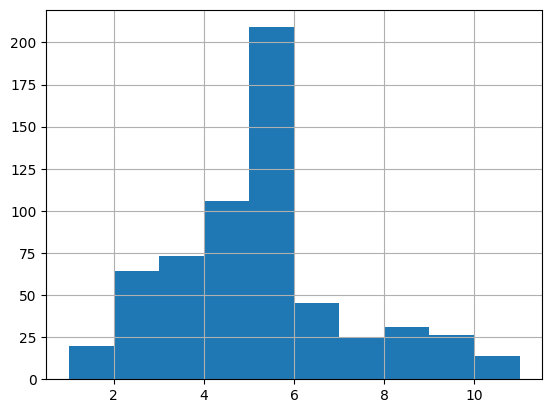

In [62]:
pred_full[pred_full['d']=='Mononegavirales']['domain_label'].apply(lambda x:len([i for i in x if len(i)>0])).hist()

In [73]:
pred_full[pred_full['d']=='Bunyavirales']['domain_label'].apply(lambda x:len([i for i in x if len(i)>0])).value_counts()

domain_label
2     731
1     603
3     140
15      2
Name: count, dtype: int64

In [72]:
pred_full['domain_counts']=pred_full['domain_label'].apply(lambda x:len([i for i in x if len(i)>0]))

In [102]:
from hierataxo.plot_taxotree import configure_rcParams
configure_rcParams()
from hierataxo.util import hide_spline
import seaborn as sns
# import seaborn as sns
from hierataxo.util import taxo_palette,hide_spline
plt.close()
fig,ax=plt.subplots(1,1,figsize=(8,6))
pred_full['d-']=pred_full['d'].apply(lambda x: x.replace('virales','-'))
named_taxo_palette_={k.replace('virales','-'):v for k,v in named_taxo_palette.items() if 'virales' in k or k=='Null'}
# named_taxo_palette_['null']=named_taxo_palette['null']
pred_full_=pred_full[["domain_counts","d-"]]
pred_full_.columns=['domain counts','Order']
pred_full_=pred_full_[pred_full_['Order'].isin(['Mononega-','Jingchu-','Bunya-','Bunya-'])]

pred_full_['Mononeg_RNA_pol Enrichment']=pred_full_['Order'].apply(lambda x:'true label' if x in ['Mononega-','Jingchu-'] else 'wrong predict')

sns.histplot(data=pred_full_, x="domain counts", hue='Mononeg_RNA_pol Enrichment', shrink=2.5,
             multiple="stack",ax=ax,palette={'true label':taxo_palette['red_(crayola)'][0],'wrong predict':taxo_palette['battleship_gray'][0]},
             alpha=1) #palette=named_taxo_palette_
# ax.legend(ncol=3)
sns.move_legend(ax,'upper right',ncol=3,fontsize=12,title_fontsize=15)
hide_spline(ax,'rt')
# plt.show()
fig.savefig('tmp_cm_ana/figs/domain_count_mononeg.svg')
# plt.show()
# plt.savefig()
# ax.legend()
# legend=ax.legend_
# legend.set_ncols(2)
# plt.show()

In [91]:
pred_full['d-'].unique()

array(['Ourli-', 'Tymo-', 'Nido-', 'Mononega-', 'Stella-', 'Bunya-',
       'Picorna-', 'Ghabri-', 'Nodamu-', 'Jingchu-', 'Patata-', 'Sobeli-',
       'Toli-', 'Reo-', 'Martelli-', 'Hepeli-', 'Amarillo-', 'Orter-',
       'Articula-', 'Durna-', 'Cryppa-', 'Yadokari-', 'Null', 'Goujian-',
       'Mu-', 'Serpento-', 'Wolfram-', 'Norzi-', 'Timlo-', 'Mindi-'],
      dtype=object)

In [87]:
pred_full_['Order'].value_counts()

Order
Bunya-       1476
Mononega-     613
Jingchu-       63
Name: count, dtype: int64

In [126]:
plt.close()
fig,ax=plt.subplots(1,1,figsize=(8,6))
domain_counts_init=pd.read_pickle('taxo_data/proseq_taxo_1.pkl')
domain_counts_init=domain_counts_init[~domain_counts_init['taxo'].isna()]
domain_counts_init['Order']=domain_counts_init['taxo'].apply(lambda x:x.split(' ;')[8]).apply(lambda x: x.replace('virales','-'))
domain_counts_init['domain counts']=domain_counts_init['family'].apply(lambda x:len(x))
sns.histplot(data=domain_counts_init, x="domain counts", hue="Order", multiple="stack",ax=ax,palette=named_taxo_palette_)
# ax.legend(ncol=3)
sns.move_legend(ax,'upper right',ncol=3,fontsize=12,title_fontsize=15)
hide_spline(ax,'rt')
# plt.show()
fig.savefig('tmp_cm_ana/figs/domain_count_plus.svg')

In [123]:
set(domain_counts_init['Order'])-set(named_taxo_palette_.keys())

{'Amarillo- ',
 'Articula- ',
 'Bunya- ',
 'Cryppa- ',
 'Durna- ',
 'Ghabri- ',
 'Goujian- ',
 'Hepeli- ',
 'Jingchu- ',
 'Martelli- ',
 'Mindi- ',
 'Mononega- ',
 'Mu- ',
 'Nido- ',
 'Nodamu- ',
 'Norzi- ',
 'Null ',
 'Orter- ',
 'Ourli- ',
 'Patata- ',
 'Picorna- ',
 'Reo- ',
 'Serpento- ',
 'Sobeli- ',
 'Stella- ',
 'Timlo- ',
 'Toli- ',
 'Tymo- ',
 'Wolfram- ',
 'Yadokari- '}

In [116]:
named_taxo_palette_

{'Null': '#cccccc',
 'Ghabri-': '#ff80b9',
 'Reo-': '#f9acd4',
 'Mindi-': '#ff8080',
 'Hepeli-': '#e79f8b',
 'Martelli-': '#febaad',
 'Tymo-': '#ffb380',
 'Amarillo-': '#ffff00',
 'Nodamu-': '#ffcc00',
 'Toli-': '#decd87',
 'Wolfram-': '#ecff00',
 'Cryppa-': '#e0ff66',
 'Norzi-': '#e9f683',
 'Timlo-': '#d0ef7a',
 'Ourli-': '#d3ff7a',
 'Mu-': '#b0e481',
 'Serpento-': '#91e77e',
 'Jingchu-': '#6cdc77',
 'Mononega-': '#2ec455',
 'Goujian-': '#6cef91',
 'Bunya-': '#88f8bd',
 'Articula-': '#79f7ce',
 'Durna-': '#19f5d0',
 'Nido-': '#00cfdd',
 'Picorna-': '#98eaff',
 'Sobeli-': '#72c6ff',
 'Patata-': '#84a8ff',
 'Stella-': '#999ce0',
 'Yadokari-': '#867fdf',
 'Bluber-': '#ccaaff',
 'Orter-': '#eeaaff'}

In [111]:
domain_counts_init

,seq,taxo,family,Order
6PavOLV7||MN532594,----------------------------------------------...,Riboviria ;Null ;Orthornavirae ;Null ;Lenarvir...,"(Mitovir_RNA_pol,)",Ourlivirales
AAV1||KF421905,-HYNMPIEAATKLESFGIITNPYSIALHSHAAAKVCEN-KLLDTVG...,Riboviria ;Null ;Orthornavirae ;Null ;Kitrinov...,"(Vmethyltransf, FTO_NTD, Viral_helicase1, RdRP_3)",Tymovirales
AAbV||GBBW01007738,----------------------------------------------...,Riboviria ;Null ;Orthornavirae ;Null ;Pisuviri...,"(DUF316, DUF2075, RdRP_2, CoV_RPol_N, LAP1_C)",Nidovirales
AAnV1|0|BK059208,----------------------------------------------...,Riboviria ;Null ;Orthornavirae ;Null ;Negarnav...,"(Mononeg_RNA_pol, Mononeg_mRNAcap, Methyltrans...",Mononegavirales
AAnV1|1|BK059209,WPDSRMHGKT--------GIRLIYLSTANRLRIGKRVINDLHTGIS...,Riboviria ;Null ;Orthornavirae ;Null ;Negarnav...,"(Rhabdo_ncap_2,)",Mononegavirales
...,...,...,...,...
phi2954|L|FJ608823,----------------------------------------------...,Riboviria ;Null ;Orthornavirae ;Null ;Duplorna...,"(RdRP_1, NTPase_P4)",Mindivirales
phi6|L|M17461,----------------------------------------------...,Riboviria ;Null ;Orthornavirae ;Null ;Duplorna...,"(RdRP_2, NTPase_P4)",Mindivirales
phi8|L|AF226851,----------------------------------------QRLIE-...,Riboviria ;Null ;Orthornavirae ;Null ;Duplorna...,"(RecA,)",Mindivirales
phiNN|L|KJ957164,ADLLDAAPVSLQVLGRPTQINSKAITAYI---AAVMDlASKSGGVL...,Riboviria ;Null ;Orthornavirae ;Null ;Duplorna...,"(NTPase_P4,)",Mindivirales


In [96]:
named_taxo_palette_

{'Ghabri-': '#ff80b9',
 'Reo-': '#f9acd4',
 'Mindi-': '#ff8080',
 'Hepeli-': '#e79f8b',
 'Martelli-': '#febaad',
 'Tymo-': '#ffb380',
 'Amarillo-': '#ffff00',
 'Nodamu-': '#ffcc00',
 'Toli-': '#decd87',
 'Wolfram-': '#ecff00',
 'Cryppa-': '#e0ff66',
 'Norzi-': '#e9f683',
 'Timlo-': '#d0ef7a',
 'Ourli-': '#d3ff7a',
 'Mu-': '#b0e481',
 'Serpento-': '#91e77e',
 'Jingchu-': '#6cdc77',
 'Mononega-': '#2ec455',
 'Goujian-': '#6cef91',
 'Bunya-': '#88f8bd',
 'Articula-': '#79f7ce',
 'Durna-': '#19f5d0',
 'Nido-': '#00cfdd',
 'Picorna-': '#98eaff',
 'Sobeli-': '#72c6ff',
 'Patata-': '#84a8ff',
 'Stella-': '#999ce0',
 'Yadokari-': '#867fdf',
 'Bluber-': '#ccaaff',
 'Orter-': '#eeaaff'}

In [81]:
ax.legend_.__dir__()

['_stale',
 'stale_callback',
 '_axes',
 'figure',
 '_transform',
 '_transformSet',
 '_visible',
 '_animated',
 '_alpha',
 'clipbox',
 '_clippath',
 '_clipon',
 '_label',
 '_picker',
 '_rasterized',
 '_agg_filter',
 '_mouseover',
 '_callbacks',
 '_remove_method',
 '_url',
 '_gid',
 '_snap',
 '_sketch',
 '_path_effects',
 '_sticky_edges',
 '_in_layout',
 'prop',
 '_fontsize',
 'texts',
 'legend_handles',
 '_legend_title_box',
 '_custom_handler_map',
 'numpoints',
 'markerscale',
 'scatterpoints',
 'borderpad',
 'labelspacing',
 'handlelength',
 'handleheight',
 'handletextpad',
 'borderaxespad',
 'columnspacing',
 'shadow',
 '_ncols',
 '_scatteryoffsets',
 '_legend_box',
 'isaxes',
 'parent',
 '_mode',
 '_bbox_to_anchor',
 '_shadow_props',
 'legendPatch',
 '_alignment',
 '_legend_handle_box',
 '_loc_used_default',
 '_outside_loc',
 '_loc_real',
 '_draggable',
 '__module__',
 '__doc__',
 'codes',
 'zorder',
 '__str__',
 '__init__',
 '_set_artist_props',
 'set_loc',
 '_set_loc',
 'set_nco

In [82]:
type(ax.legend_)

matplotlib.legend.Legend

In [ ]:
from matplotlib.legend import Legend